# Google Cloud Platform - Using Machine Learning APIs.


Based on [Colab Notebooks](https://console.cloud.google.com/marketplace/product/colab-marketplace-image-public/colab) available in GCP Marketplace.


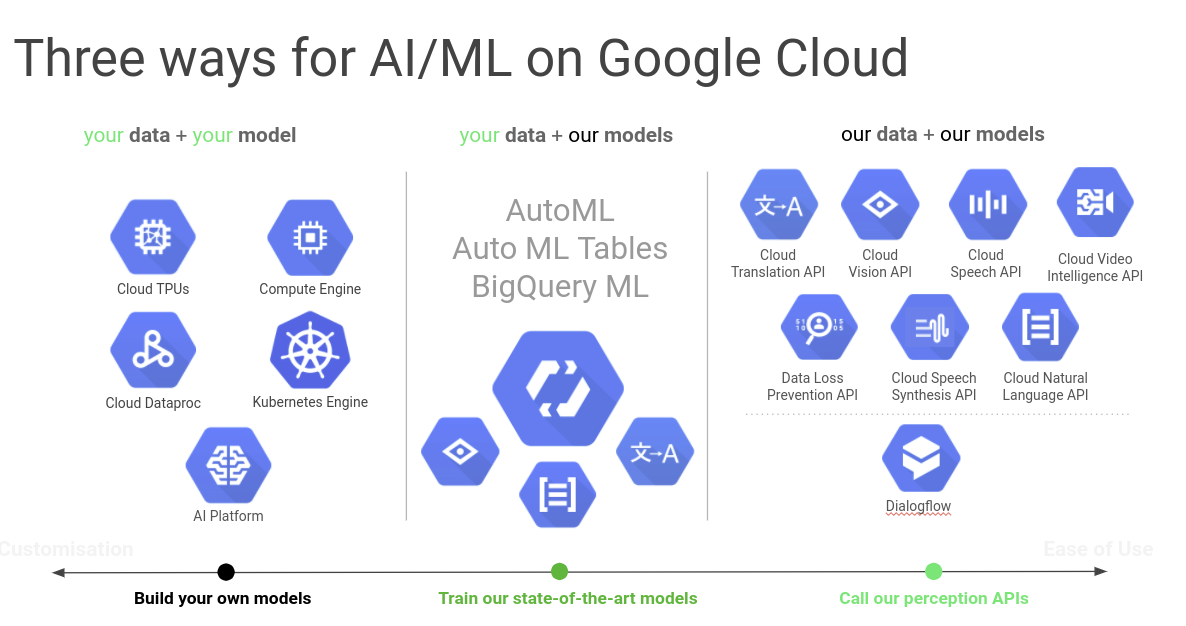

# Introduction to the Cloud API's
Not all of them but many of them:
  - [Cloud Translation API](https://cloud.google.com/translate)
  - [Cloud Vision API](https://cloud.google.com/vision)
  - [Cloud Document API](https://cloud.google.com/document-ai)
  - [Cloud DLP API](https://cloud.google.com/dlp)
  - [Cloud Speech to Text API](https://cloud.google.com/speech-to-text)
  - [Cloud Text to Speech API](https://cloud.google.com/text-to-speech)
  - [Cloud Natural Language API](https://cloud.google.com/natural-language).


### Security

First things first - we need to authenticate against the Google Cloud APIs.

#### Getting a Google API Credential.

First, visit <a href="http://console.cloud.google.com/apis">API console</a>, choose "Credentials" on the left-hand menu.  Choose "Create Credentials" and generate an API key for your application. You should probably restrict it by IP address to prevent abuse, but for now, just  leave that field blank and delete the API key after trying out this demo.

Then, when you have your key, you will enter it in this first executable cell:

In [4]:
APIKEY = "REPLACE ME" # @param {type:"string"}
print( f"{APIKEY}" ) 

REPLACE ME


From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
<li> Google Translate API </li>
<li> Google Cloud Vision API </li>
<li> Google Natural Language API </li>
<li> Google Cloud Speech API </li>
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab).

```!pip install --upgrade pip```

```!pip install --upgrade google-api-python-client```


In [ ]:
!pip install --upgrade pip
!pip install --upgrade google-api-python-client

     |████████████████████████████████| 1.7 MB 8.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 7.8 MB 7.5 MB/s            
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.288 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.30.0 which i

## Invoke Translate API

[Google Cloud Translation](https://cloud.google.com/translate/docs/) documentation.  I know a lot has gone on here - see [my LSTM notebook](https://nbviewer.jupyter.org/github/jeffreyrnorton/Notebooks_MachineLearning/blob/master/DeepNetsWithKeras_ANN_LSTM.ipynb) where I trained a Seq2Seq LSTM network to do translation on a relatively small vocabulary.

Also note that this is a service.  The translation is not happening on the VM running the notebook, but is running as a service.  This is where we start seeing the true power of cloud compute!

### Using the API

In [ ]:
import sys
if 'google.colab' in sys.modules:
  from google.colab import auth
  auth.authenticate_user()
  print('Authenticated')

Authenticated


In [ ]:
#@title Upload Application Key (json file)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  creds=fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=creds, length=len(uploaded[fn])))
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=creds

print(os.environ['GOOGLE_APPLICATION_CREDENTIALS'])

Saving aburdenko-project-855c2dc51fae.json to aburdenko-project-855c2dc51fae.json
User uploaded file "aburdenko-project-855c2dc51fae.json" with length 2320 bytes
aburdenko-project-855c2dc51fae.json


In [ ]:
# Required Parameters
GOOGLE_CLOUD_PROJECT = "aburdenko-project"  # @param {type:"string"}
%env GOOGLE_CLOUD_PROJECT=GOOGLE_CLOUD_PROJECT
REGION = "us-central1"
SUFFIX = "aiplatform.googleapis.com"
API_ENDPOINT = f"{REGION}-{SUFFIX}"
PREDICT_API_ENDPOINT = f"{REGION}-prediction-{SUFFIX}"
import os
if os.getenv("IS_TESTING"):
    !gcloud --quiet components install beta
    !gcloud --quiet components update
!gcloud config set project $GOOGLE_CLOUD_PROJECT
!gcloud config set ai/region $REGION

SERVICE_ACCOUNT_ID="api-fun"

nb_path_lib='/content/notebooks/lib'
import sys
sys.path.append(nb_path_lib)

# Add installed library dependencies to Python PATH variable.
PATH=%env PATH
%env PATH={PATH}:/home/jupyter/.local/bin
!echo $PATH
!echo $GOOGLE_CLOUD_PROJECT

env: GOOGLE_CLOUD_PROJECT=GOOGLE_CLOUD_PROJECT
Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey

Updated property [ai/region].
env: PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/home/jupyter/.local/bin
/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
aburdenko-project


In [ ]:
#Check if Authorized

!curl -X POST \
-H "Authorization: Bearer "$(gcloud auth application-default print-access-token) \
-H "Content-Type: application/json; charset=utf-8" \
-d @request.json \
https://translation.googleapis.com/language/translate/v2/detect

{
  "error": {
    "code": 400,
    "message": "Required Text",
    "errors": [
      {
        "message": "Required Text",
        "domain": "global",
        "reason": "required"
      }
    ]
  }
}


In [ ]:
from google.cloud import translate_v2 as translate
translate_client = translate.Client()

input = 'is it really this easy?'
translate_client.detect_language(input)['language']

'en'

### Using the REST Endpoint Directly

In [ ]:
# running Translate API
from googleapiclient.discovery import build
service = build('translate', 'v2', developerKey=APIKEY)

# use the service
inputs = ['is it really this easy?', 'amazing technology', 'wow']
outputs = service.translations().list(source='en', target='fr', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

is it really this easy? -> est-ce vraiment si facile ?
amazing technology -> technologie étonnante
wow -> Wow


That is really cool - how would a Gallego (a person from Galicia in the Northwest corner of Spain) say it?

In [ ]:
outputs = service.translations().list(source='en', target='gl', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

is it really this easy? -> é realmente así de fácil?
amazing technology -> tecnoloxía incrible
wow -> vaia


## Invoke Vision API

The [Vision API](https://cloud.google.com/vision/docs/) can work off an image in Cloud Storage or embedded directly into a POST message. I'll use Cloud Storage and do OCR on this image: <img src="https://storage.googleapis.com/cloud-training-demos/vision/sign2.jpg" width="200" />.  
That photograph is from http://www.publicdomainpictures.net/view-image.php?image=15842.

In [ ]:
# Running Vision API
import base64
IMAGE="gs://cloud-training-demos/vision/sign2.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })
responses = request.execute(num_retries=3)
print(responses['responses'][0]['textAnnotations'][0]['description'])

请您爱护和保
护卫生创建优
美水环境



In [ ]:
foreigntext = responses['responses'][0]['textAnnotations'][0]['description']
foreignlang = responses['responses'][0]['textAnnotations'][0]['locale']
print('Language Code = {}.  Foreign Text:\n{}'.format(foreignlang,foreigntext))

Language Code = zh.  Foreign Text:
请您爱护和保
护卫生创建优
美水环境



## Translate sign

I don't read Chinese - what does it say.  Let's run it through the translator.

In [ ]:
inputs=[foreigntext]
outputs = service.translations().list(source=foreignlang, target='en', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

请您爱护和保
护卫生创建优
美水环境
 -> Please cherish and protect sanitation to create a beautiful water environment


## More OCR with the Vision API
OCR intrigues me - it is actually quite difficult to do well and there are engines like Tesseract that aren't too bad.  So I want to try the engine with a POST and see if it can extract some English for me, but on a very difficult sign (text with skew):

In [ ]:
import IPython.display

IPython.display.Image(url="https://get.pxhere.com/photo/road-highway-advertising-travel-sign-community-usa-landmark-street-sign-attraction-historic-tourism-signage-road-sign-illinois-history-66-traffic-sign-route-66-mother-road-odell-644464.jpg",
                      width=600)

In [ ]:
IMAGE="https://get.pxhere.com/photo/road-highway-advertising-travel-sign-community-usa-landmark-street-sign-attraction-historic-tourism-signage-road-sign-illinois-history-66-traffic-sign-route-66-mother-road-odell-644464.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'imageUri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 5,
                }]
            }],
        })
responses = request.execute(num_retries=5)
print(responses['responses'][0]['textAnnotations'][0]['description'])

ROUTE
ROADSIDE
ATTRACTION
99
1932 STANDARD OIL GAS STATION, ODELL, ILLINOIS
This restoration is a project of the Route 66 Association of
llinois Preservation Committee. Identified November 9, 1997
on the National Register of Historic Places.
TV



Checking the end of the text with the sign - how did we do?  We missed one full line of text - so OCR still remains a difficult text, even for Google!

### PDF Document Translation

The OCR above works in general on images.  However, there also is a service which operates on PDF documents - as they [say](https://cloud.google.com/vision/docs/ocr), small dense text.

Let's try this page from the writings of everybody's favorite fat king eating turkey legs and screaming out "Call the Executioner" - King Henry the VIII:
![](https://storage.googleapis.com/scoobie_earthquakes/HenryVII_863arabic_0202.jpg)

In [ ]:
IMAGE="gs://scoobie_earthquakes/HenryVII_863arabic_0202.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'DOCUMENT_TEXT_DETECTION',
                    'maxResults': 5,
                }]
            }],
        })
responses = request.execute(num_retries=5)
print(responses['responses'][0]['textAnnotations'][0]['description'])

202
35 HENRY VIII.
1544.
318. CHAPUys to the QUEEN OP HUNGARY-cont.
the notice of the Emperor's declaration against Scotland and the certificate
of hostility. And on this they again consulted the King, who sant word
that he would make no other promise than that after the Emperor's declara
tion be would do as tbe treaty bound bim, and that Chapuys should
write to the Emperor to make the declaration as he had promised to do wben
authentically advertised of tbe hostility between the King and the Boote.
as, they said, he had been, by the King's letters. Answered abortly and
brusquely tbat there was no great resson in their demand, and, as he had
before shown them, far more occasion for the King to make his declaration
first, since the hostility between the Emperor and Holstein preceded that of
the King and the Scots, as likewise did the requisition for the King to
declare himself; and they ought to make no difficulty, especially when
Holstein has often boasted a wish to conquer this realm,

## Sentiment analysis with Language API

Let's evaluate the sentiment of some famous quotes using [Google Cloud Natural Language API](https://cloud.google.com/natural-language/docs/).

In [ ]:
lservice = build('language', 'v1beta1', developerKey=APIKEY)
quotes = [
  'To succeed, you must have tremendous perseverance, tremendous will.',
  'It’s not that I’m so smart, it’s just that I stay with problems longer.',
  'Love is quivering happiness.',
  'Love is of all passions the strongest, for it attacks simultaneously the head, the heart, and the senses.',
  'What difference does it make to the dead, the orphans and the homeless, whether the mad destruction is wrought under the name of totalitarianism or in the holy name of liberty or democracy?',
  'When someone you love dies, and you’re not expecting it, you don’t lose her all at once; you lose her in pieces over a long time — the way the mail stops coming, and her scent fades from the pillows and even from the clothes in her closet and drawers. '
]
for quote in quotes:
  response = lservice.documents().analyzeSentiment(
    body={
      'document': {
         'type': 'PLAIN_TEXT',
         'content': quote
      }
    }).execute()
  polarity = response['documentSentiment']['polarity']
  magnitude = response['documentSentiment']['magnitude']
  print('POLARITY=%s MAGNITUDE=%s for %s' % (polarity, magnitude, quote))

POLARITY=1 MAGNITUDE=0.9 for To succeed, you must have tremendous perseverance, tremendous will.
POLARITY=-1 MAGNITUDE=0.5 for It’s not that I’m so smart, it’s just that I stay with problems longer.
POLARITY=1 MAGNITUDE=0.9 for Love is quivering happiness.
POLARITY=1 MAGNITUDE=0.9 for Love is of all passions the strongest, for it attacks simultaneously the head, the heart, and the senses.
POLARITY=1 MAGNITUDE=0.2 for What difference does it make to the dead, the orphans and the homeless, whether the mad destruction is wrought under the name of totalitarianism or in the holy name of liberty or democracy?
POLARITY=-1 MAGNITUDE=0.4 for When someone you love dies, and you’re not expecting it, you don’t lose her all at once; you lose her in pieces over a long time — the way the mail stops coming, and her scent fades from the pillows and even from the clothes in her closet and drawers. 


In a [paper](https://arxiv.org/pdf/1010.3003.pdf) published in 2010 by Bollen et al, it was claimed that there was 87% correlation between tweets and the stock market.  In January 2013, the following *false* tweet was sent which [momentarily sent Serepta Therapeutics falling](http://fortune.com/2015/12/07/dataminr-hedge-funds-twitter-data/), but when investors realized the ruse, it quickly recovered.  Let's process the [tweet](http://kiddynamitesworld.com/the-sec-needs-to-arrest-some-people/).

"$SRPT FDA steps in as its 48 weeks results on Eteplirsen results are tainted and have been doctored they believeTrial papers seized by FDA."

In [ ]:
quotes = [
  '$SRPT FDA steps in as its 48 weeks results on Eteplirsen results are tainted and have been doctored they believeTrial papers seized by FDA.'
]
for quote in quotes:
  response = lservice.documents().analyzeSentiment(
    body={
      'document': {
         'type': 'PLAIN_TEXT',
         'content': quote
      }
    }).execute()
  polarity = response['documentSentiment']['polarity']
  magnitude = response['documentSentiment']['magnitude']
  print('POLARITY=%s MAGNITUDE=%s for %s' % (polarity, magnitude, quote))

POLARITY=-1 MAGNITUDE=0.9 for $SRPT FDA steps in as its 48 weeks results on Eteplirsen results are tainted and have been doctored they believeTrial papers seized by FDA.


And we see that this *is* a very negative statement - no wonder it impacted the market as Forbes relates.

<h2> Speech API </h2>

The [Speech API](https://cloud.google.com/speech-to-text/docs/) can work on streaming data, audio content encoded and embedded directly into the POST message, or on a file on Cloud Storage. Pass in this <a href="https://storage.googleapis.com/cloud-training-demos/vision/audio.raw">audio file</a> from Cloud Storage.

In [ ]:
sservice = build('speech', 'v1beta1', developerKey=APIKEY)
response = sservice.speech().syncrecognize(
    body={
        'config': {
            'encoding': 'LINEAR16',
            'sampleRate': 16000
        },
        'audio': {
            'uri': 'gs://cloud-training-demos/vision/audio.raw'
            }
        }).execute()
print(response)

{'results': [{'alternatives': [{'transcript': 'how old is the Brooklyn Bridge', 'confidence': 0.98360395}]}]}


In [ ]:
print(response['results'][0]['alternatives'][0]['transcript'])
print('Confidence=%f' % response['results'][0]['alternatives'][0]['confidence'])

how old is the Brooklyn Bridge
Confidence=0.983604


## Challenge Exercise

Here are a few portraits from the Metropolitan Museum of Art, New York (they are part of a [BigQuery public dataset](https://bigquery.cloud.google.com/dataset/bigquery-public-data:the_met) ):

gs://gcs-public-data--met/14295/0.jpg  
<img src="https://raw.githubusercontent.com/jeffreyrnorton/Notebooks_MachineLearning/master/images/14295.jpg" width=400>

gs://gcs-public-data--met/15091/0.jpg  
<img src="https://raw.githubusercontent.com/jeffreyrnorton/Notebooks_MachineLearning/master/images/15091.jpg" width=400>

(Two given in the original assignment are not publically available and what good is it to tell you unhappy or happy when you can't see the photo?)

Use the Vision API to identify which of these images depict happy people and which ones depict unhappy people.

Hint: You will need to look for joyLikelihood and/or sorrowLikelihood from the response.

In [ ]:
IMAGE="gs://gcs-public-data--met/14295/0.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcsImageUri': IMAGE
                    }
                },
                'features': [{
                    'type': 'FACE_DETECTION'
                }]
            }],
        })
responses = request.execute()
print(responses)

{'responses': [{'faceAnnotations': [{'boundingPoly': {'vertices': [{'x': 1574, 'y': 1151}, {'x': 1760, 'y': 1151}, {'x': 1760, 'y': 1367}, {'x': 1574, 'y': 1367}]}, 'fdBoundingPoly': {'vertices': [{'x': 1589, 'y': 1199}, {'x': 1748, 'y': 1199}, {'x': 1748, 'y': 1358}, {'x': 1589, 'y': 1358}]}, 'landmarks': [{'type': 'LEFT_EYE', 'position': {'x': 1657.5417, 'y': 1239.4186, 'z': -0.00067241676}}, {'type': 'RIGHT_EYE', 'position': {'x': 1709.117, 'y': 1269.9839, 'z': 6.37109}}, {'type': 'LEFT_OF_LEFT_EYEBROW', 'position': {'x': 1648.5151, 'y': 1221.4691, 'z': 3.180908}}, {'type': 'RIGHT_OF_LEFT_EYEBROW', 'position': {'x': 1679.7795, 'y': 1238.1575, 'z': -9.626153}}, {'type': 'LEFT_OF_RIGHT_EYEBROW', 'position': {'x': 1703.0846, 'y': 1251.854, 'z': -6.6261573}}, {'type': 'RIGHT_OF_RIGHT_EYEBROW', 'position': {'x': 1730.7343, 'y': 1266.6852, 'z': 13.025247}}, {'type': 'MIDPOINT_BETWEEN_EYES', 'position': {'x': 1685.7417, 'y': 1255.671, 'z': -8.505504}}, {'type': 'NOSE_TIP', 'position': {'x'

As a matter of interest - we can crop to the face with the following code:
```
xlow = ylow = 100000
xhigh = yhigh = -1
for point in responses['responses'][0]['faceAnnotations'][0]['boundingPoly']['vertices']:
    x = point['x']
    y = point['y']
    if x < xlow: xlow = x
    if y < ylow: ylow = y
    if x > xhigh: xhigh = x
    if y > yhigh: yhigh = y

from PIL import Image
import urllib.request

url = "https://raw.githubusercontent.com/jeffreyrnorton/Notebooks_MachineLearning/master/images/14295.jpg"
response = urllib.request.urlretrieve(url, "tmp/i.jpg")
img = Image.open("tmp/i.jpg")
img2 = img.crop((xlow, ylow, xhigh, yhigh))
img2.save("tmp/img2.jpg")
```

But of course, what we are really interested in are the emotions which we can print out.

In [ ]:
annotation = responses['responses'][0]['faceAnnotations'][0]
print('Surprise: {}, Joy: {}, Sorrow: {}'.format(annotation['surpriseLikelihood'], annotation['joyLikelihood'], annotation['sorrowLikelihood']))

Surprise: VERY_UNLIKELY, Joy: LIKELY, Sorrow: VERY_UNLIKELY


<img src="https://raw.githubusercontent.com/jeffreyrnorton/Notebooks_MachineLearning/master/images/14295.jpg" width=400>

Now that we have explored this - let's write the code to process the other image very concisely and as a function where we assume we are always getting the image from a Google bucket.

In [ ]:
def emotion_detector(apikey, image):
    vservice = build('vision', 'v1', developerKey=apikey)
    request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcsImageUri': image
                    }
                },
                'features': [{
                    'type': 'FACE_DETECTION'
                }]
            }],
        })
    responses = request.execute()
    annotation = responses['responses'][0]['faceAnnotations'][0]
    return {'Surprise':annotation['surpriseLikelihood'],
            'Joy':annotation['joyLikelihood'],
            'Sorrow':annotation['sorrowLikelihood']}

IMAGE="gs://gcs-public-data--met/14295/0.jpg"
print(emotion_detector(APIKEY, IMAGE))



{'Surprise': 'VERY_UNLIKELY', 'Joy': 'LIKELY', 'Sorrow': 'VERY_UNLIKELY'}


<img src="https://raw.githubusercontent.com/jeffreyrnorton/Notebooks_MachineLearning/master/images/15091.jpg" width=400>

<h2> Clean up </h2>

Remember to delete the API key by visiting <a href="http://console.cloud.google.com/apis">API console</a>.

If necessary, commit all your notebooks to git.

If you are running Datalab on a Compute Engine VM or delegating to one, remember to stop or shut it down so that you are not charged.


Copyright 2018 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.